In [14]:
import tensorflow as tf
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.0.0


In [2]:
# Make the dataset
# Random function returns the random number between 0 and 1
n = 1000
X = np.random.random((n, 2)) * 6 - 3 # uniformly distributed between (-3,3)
y = np.cos(2 * X[:, 0]) + np.cos(3*X[:, 1])

This implements the function:

$$ y = \cos(2x_1) + cos(3x_2) $$

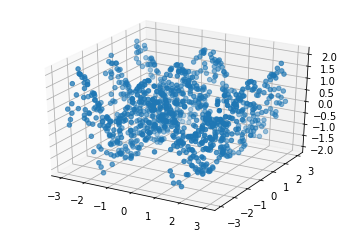

In [5]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)
plt.show()

In [6]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
  tf.keras.layers.Dense(1)
])

In [21]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 1s 540us/sample - loss: 0.1196
Epoch 2/100
1000/1000 [==============================] - 0s 96us/sample - loss: 0.0181
Epoch 3/100
1000/1000 [==============================] - 0s 82us/sample - loss: 0.0058
Epoch 4/100
1000/1000 [==============================] - 0s 100us/sample - loss: 0.0042
Epoch 5/100
1000/1000 [==============================] - 0s 102us/sample - loss: 0.0072
Epoch 6/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0046
Epoch 7/100
1000/1000 [==============================] - 0s 105us/sample - loss: 0.0034
Epoch 8/100
1000/1000 [==============================] - 0s 96us/sample - loss: 0.0090
Epoch 9/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0080
Epoch 10/100
1000/1000 [==============================] - 0s 93us/sample - loss: 0.0072
Epoch 11/100
1000/1000 [==============================] - 0s 84us/sample - loss: 0.0086
Epoch 12/100
10

1000/1000 [==============================] - 0s 79us/sample - loss: 0.0063
Epoch 94/100
1000/1000 [==============================] - 0s 83us/sample - loss: 0.0183
Epoch 95/100
1000/1000 [==============================] - 0s 97us/sample - loss: 0.0163
Epoch 96/100
1000/1000 [==============================] - 0s 75us/sample - loss: 0.0192
Epoch 97/100
1000/1000 [==============================] - 0s 87us/sample - loss: 0.0086
Epoch 98/100
1000/1000 [==============================] - 0s 94us/sample - loss: 0.0183
Epoch 99/100
1000/1000 [==============================] - 0s 77us/sample - loss: 0.0252
Epoch 100/100
1000/1000 [==============================] - 0s 78us/sample - loss: 0.0138


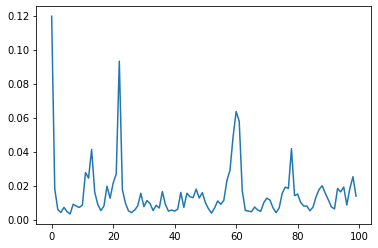

In [22]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.show()

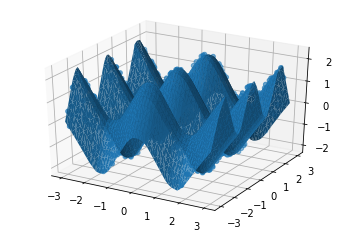

In [17]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

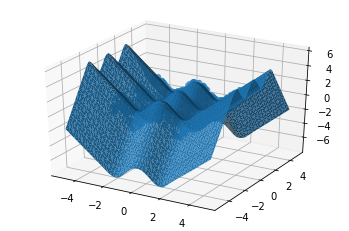

In [18]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y)

# surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()